# Software Grayscale and Sobel filters on HDMI input

This example notebook will demonstrate two image filters using a snapshot from the HDMI input: <br>
1. First, a frame is read from HDMI input
2. That image is saved and displayed in the notebook
3. Some simple Python pixel-level image processing is done (Gray Scale conversion, and Sobel filter)

## 1. Start the HDMI input
An HDMI input source is required for this example. This should be on, and connected to the board before running the code below.

In [2]:
from pynq.overlays.base import BaseOverlay
from pynq.lib.video import *
import PIL.Image
base = BaseOverlay("base.bit")
hdmi_in = base.video.hdmi_in
hdmi_in.configure()
hdmi_in.start()

## 2. Save frame and display JPG

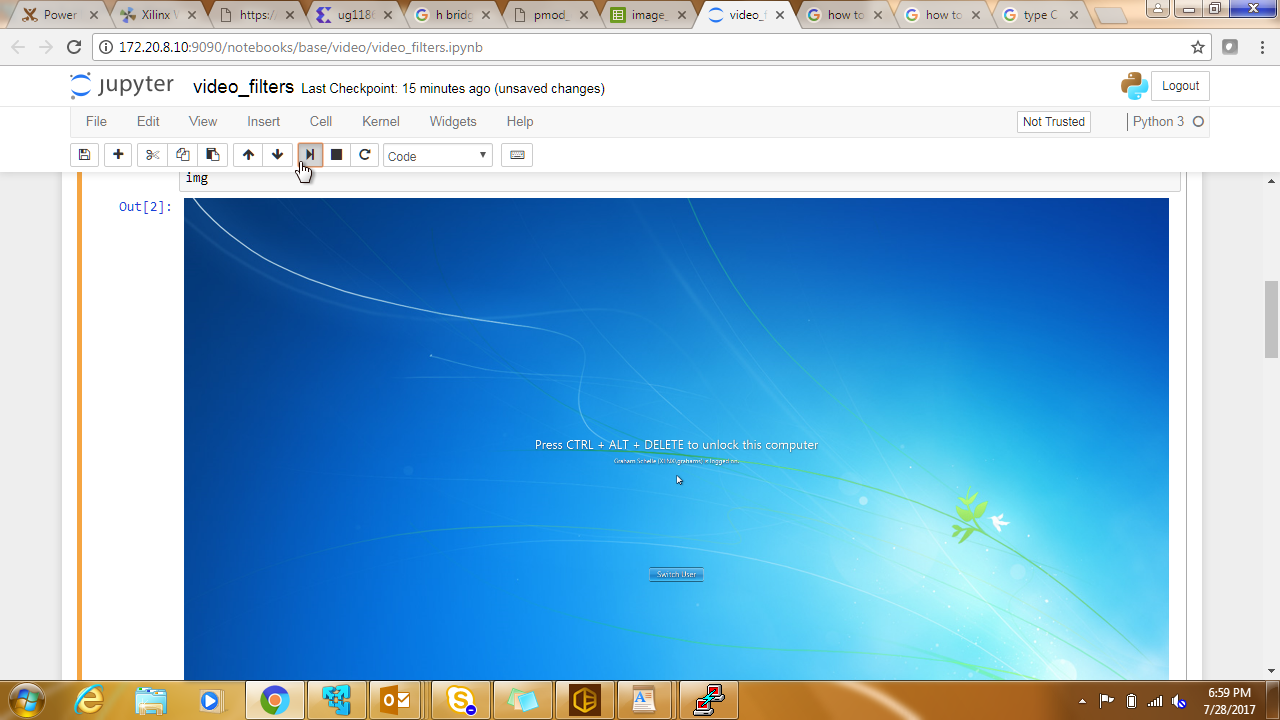

In [3]:
frame = hdmi_in.readframe()
img = PIL.Image.fromarray(frame)
img.save("/home/xilinx/jupyter_notebooks/base/video/data/orig.jpg")

img

## 3. Gray Scale filter
This cell should take ~50s to complete. Note that there are better ways (e.g., openCV, etc.) to do grayscale conversion, but this is just an example of doing that without using any additional library.

In [ ]:
height = hdmi_in.mode.height
width = hdmi_in.mode.width
frame_i = frame
for y in range(0, height):
    for x in range(0, width):
        gray = round((0.299*frame_i[y][x][2]) + 
                     (0.587*frame_i[y][x][0]) +
                     (0.114*frame_i[y][x][1]))
        frame_i[y][x] = [gray,gray,gray]

gray_img = PIL.Image.fromarray(frame_i)
gray_img.save("/home/xilinx/jupyter_notebooks/base/video/data/gray.jpg")

gray_img

## 4: Free up space

In [5]:
hdmi.stop()

del sobel
del hdmi